In [1]:
import os

os.environ["CRESTED_DATA_DIR"] = "/cluster/project/treutlein/USERS/jjans/analysis/crested/data"
#os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"

In [2]:
import os
import tensorflow as tf

# Check CUDA paths
print("CUDA_HOME:", os.environ.get("CUDA_HOME"))
print("LD_LIBRARY_PATH:", os.environ.get("LD_LIBRARY_PATH"))
print("PATH:", os.environ.get("PATH"))

# Check TensorFlow CUDA version
print("TensorFlow CUDA Build Info:", tf.sysconfig.get_build_info())

# Check where libcudart is loaded from
!ldd $(which python) | grep cuda

2025-06-20 13:06:49.080040: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


CUDA_HOME: /cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/cuda-12.2.1-fv6yilrnidoe35nh24iszjkf63bihikt
LD_LIBRARY_PATH: /cluster/software/manual/julia/1.10.3/x86_64/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/r-4.3.2-c6hxdn6t4ao6fbqv4cg2xqinhwtwdwbn/rlib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/r-4.3.2-c6hxdn6t4ao6fbqv4cg2xqinhwtwdwbn/rlib/R/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/cuda-12.2.1-fv6yilrnidoe35nh24iszjkf63bihikt/lib64:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/python-3.11.6-m4n2ny4dwaqmeobuqquo3gpyw2bct67i/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-11.4.0/gcc-13.2.0-6t2bdhlkrktlyopht3nbmjz3emlsqeog/lib64:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-11.4.0/gcc-13.2.0-6

In [3]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())

OrderedDict({'cpu_compiler': '/home/conda/feedstock_root/build_artifacts/tensorflow-split_1716519283043/_build_env/bin/x86_64-conda-linux-gnu-gcc', 'cuda_compute_capabilities': ['sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'sm_89', 'sm_90', 'compute_90'], 'cuda_version': '12.0', 'cudnn_version': '8', 'is_cuda_build': True, 'is_rocm_build': False, 'is_tensorrt_build': False})


In [4]:
import os
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=1"

In [5]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


2025-06-20 13:07:34.350892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22806 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:01:00.0, compute capability: 7.5


In [6]:
import anndata as ad
import crested
import numpy as np

In [7]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.optimizer.set_jit(True)  # Enable XLA for optimization

In [9]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())

OrderedDict({'cpu_compiler': '/home/conda/feedstock_root/build_artifacts/tensorflow-split_1716519283043/_build_env/bin/x86_64-conda-linux-gnu-gcc', 'cuda_compute_capabilities': ['sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'sm_89', 'sm_90', 'compute_90'], 'cuda_version': '12.0', 'cudnn_version': '8', 'is_cuda_build': True, 'is_rocm_build': False, 'is_tensorrt_build': False})


In [10]:
import os
print("LD_LIBRARY_PATH:", os.environ.get("LD_LIBRARY_PATH"))
print("PATH:", os.environ.get("PATH"))

LD_LIBRARY_PATH: /cluster/software/manual/julia/1.10.3/x86_64/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/r-4.3.2-c6hxdn6t4ao6fbqv4cg2xqinhwtwdwbn/rlib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/r-4.3.2-c6hxdn6t4ao6fbqv4cg2xqinhwtwdwbn/rlib/R/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/cuda-12.2.1-fv6yilrnidoe35nh24iszjkf63bihikt/lib64:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/python-3.11.6-m4n2ny4dwaqmeobuqquo3gpyw2bct67i/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-11.4.0/gcc-13.2.0-6t2bdhlkrktlyopht3nbmjz3emlsqeog/lib64:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-11.4.0/gcc-13.2.0-6t2bdhlkrktlyopht3nbmjz3emlsqeog/lib:/cluster/software/stacks/2024-05/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-13.2.0/hdf5-1.14.3-djiamwqm

In [11]:
import matplotlib
#chromosome and then segments --> necessary to work with several tools (max size is 500million)
# Set the font type to ensure text is saved as whole words
matplotlib.rcParams["pdf.fonttype"] = 42  # Use TrueType fonts instead of Type 3 fonts
matplotlib.rcParams["ps.fonttype"] = 42  # For PostScript as well, if needed

In [12]:
bigwigs_folder = 'bigwigs'
regions_file = 'diff_peaks/conserved_peaks_peaks.narrowPeak'

In [1]:
!pwd

/cluster/project/treutlein/USERS/jjans/analysis/adult_intestine/dl_models/enterocytes_v0


In [14]:
# Set the genome
genome = crested.Genome(
    "/cluster/project/treutlein/USERS/jjans/analysis/cerebellum/genomes_new/homo_sapiens/hg38.fa.gz",
)
crested.register_genome(
    genome
)  # Register the genome so that it can be used by the package

print(genome.fetch("chr1", 10000000, 10000010))

2025-06-19T13:28:51.435132+0200 INFO Genome hg38.fa.gz registered.
Aggtggatca


2025-06-19T13:29:20.624645+0200 INFO Extracting values from 6 bigWig files...
2025-06-19T13:29:29.706220+0200 WARNING 15 consensus regions have no values in any bigWig file
split
train    103208
val       14844
test      13390
Name: count, dtype: int64
2025-06-19T13:29:34.874395+0200 WARNING Region chrM:14531-16645 with coordinates chrM:14531-16645 is out of bounds for chromosome chrM. Removing region.
2025-06-19T13:29:38.289533+0200 INFO Filtering on top k Gini scores...
2025-06-19T13:29:43.892393+0200 INFO Added normalization weights to adata.obsm['weights']...


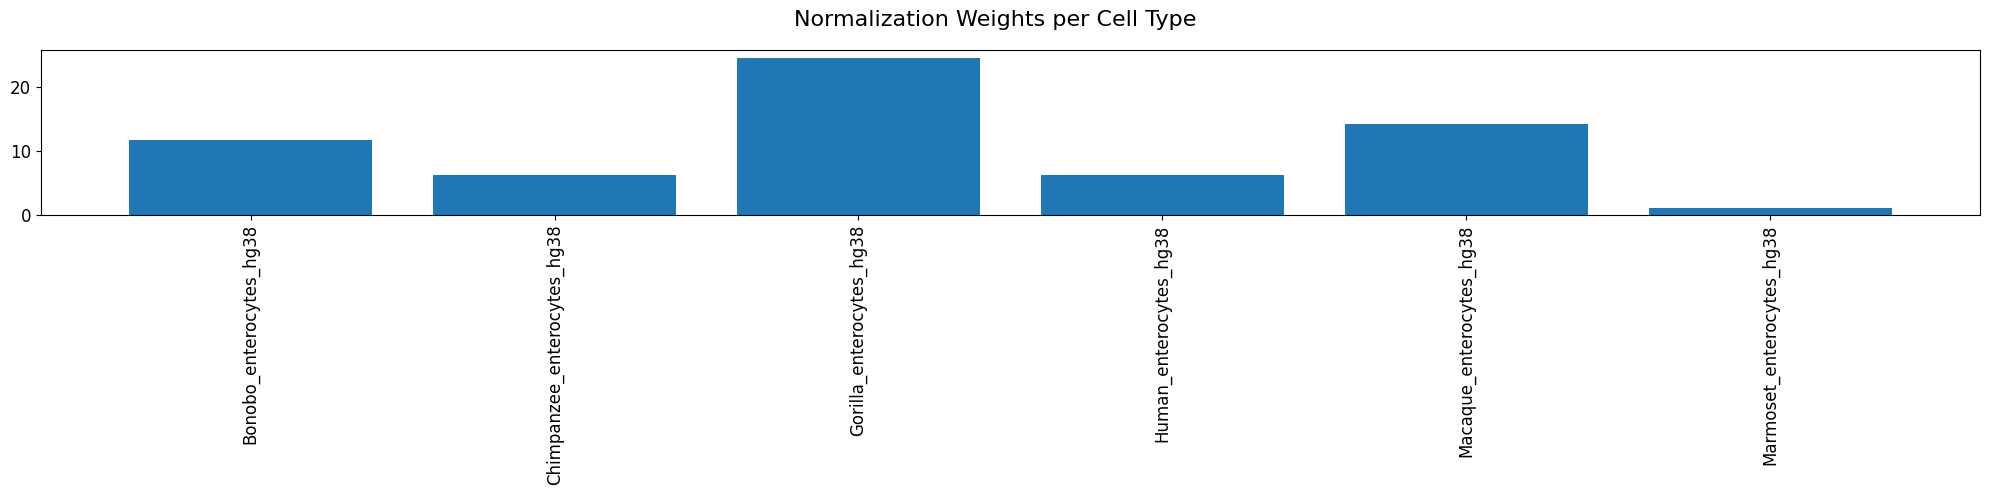

In [15]:
adata = crested.import_bigwigs(
    bigwigs_folder=bigwigs_folder,
    regions_file=regions_file,
    target_region_width=1000,  # optionally, use a different width than the consensus regions file (500bp) for the .X values calculation
    target="count",  # or "max", "mean", "logcount" --> what we will be predicting
) #count for cut bigwigs, mean for coverage bigwigs
adata

# Choose the chromosomes for the validation and test sets
crested.pp.train_val_test_split(
    adata, strategy="chr_auto")

print(adata.var["split"].value_counts())
adata.var.head(3)

crested.pp.change_regions_width(
    adata,
    2114,
)  # change the adata width of the regions to 2114bp

#we have to increase the top_k percent a lot (from 0.03) to 0.3 to prevent some cell types getting 0. These cell types do seem to have smaller bigwigs, maybe not enough cells for training. Start training with all cell types but consider removing these cell types if training does not work out well.
crested.pp.normalize_peaks(
    adata, top_k_percent=0.3 #0.3
)  # The top_k_percent parameters can be tuned based on potential bias towards cell types. If some weights are overcompensating too much, consider increasing the top_k_percent. Default is 0.01

import matplotlib.pyplot as plt
%matplotlib inline
crested.pl.bar.normalization_weights(
    adata, title="Normalization Weights per Cell Type", x_label_rotation=90,width=20,height=5
)
# Save the final preprocessing results
adata.write_h5ad("data/enterocytes_conserved.h5ad")

# Train model

In [12]:
# Set the genome
genome = crested.Genome(
    "/cluster/home/jjanssens/jjans/analysis/cerebellum/genomes_new/homo_sapiens/hg38.fa.gz",
)
crested.register_genome(
    genome
)  # Register the genome so that it can be used by the package

print(genome.fetch("chr1", 10000000, 10000010))

2025-06-20T12:58:49.423461+0200 INFO Genome hg38.fa.gz registered.
Aggtggatca


In [2]:
!ls -lah /cluster/home/jjanssens/jjans/analysis/cerebellum/genomes_new/homo_sapiens/hg38.fa.gz

ls: cannot access '/cluster/home/jjanssens/jjans/analysis/cerebellum/genomes_new/homo_sapiens/hg38.fa.gz': No such file or directory


In [13]:
# read in your preprocessed data
adata = ad.read_h5ad("data/enterocytes_conserved.h5ad")

In [16]:
datamodule = crested.tl.data.AnnDataModule(
    adata,
    batch_size=128,  # lower this if you encounter OOM errors
    max_stochastic_shift=3,  # optional data augmentation to slightly reduce overfitting
    always_reverse_complement=True,  # default True. Will double the effective size of the training dataset.
)

In [17]:
# Load chrombpnet-like architecture for a dataset with 2114bp regions and 19 cell types
model_architecture = crested.tl.zoo.chrombpnet(
    seq_len=2114, num_classes=len(list(adata.obs_names))
)

In [18]:
# Load the default configuration for training a peak regression model
config = crested.tl.default_configs(
    "peak_regression"
)  # or "topic_classification" for topic classification
print(config)

TaskConfig(optimizer=<keras.src.optimizers.adam.Adam object at 0x1541e5753800>, loss=<crested.tl.losses._cosinemse_log.CosineMSELogLoss object at 0x1541e521aba0>, metrics=[<MeanAbsoluteError name=mean_absolute_error>, <MeanSquaredError name=mean_squared_error>, <CosineSimilarity name=cosine_similarity>, <PearsonCorrelation name=pearson_correlation>, <ConcordanceCorrelationCoefficient name=concordance_correlation_coefficient>, <PearsonCorrelationLog name=pearson_correlation_log>, <ZeroPenaltyMetric name=zero_penalty_metric>])


In [19]:
# setup the trainer
trainer = crested.tl.Crested(
    data=datamodule,
    model=model_architecture,
    config=config,
    project_name="adult_intestine_enterocytes",  # change to your liking
    run_name="adult_intestine_enterocytes_v0",  # change to your liking
    logger="wandb",  # or None, 'dvc', 'tensorboard'
    seed=42,  # For reproducibility
)

In [ ]:
# train the model
trainer.fit(
    epochs=60,
    learning_rate_reduce_patience=3,
    early_stopping_patience=6,
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: jasperjanssens5 (quadbio) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence            │ (None, 2114, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 2114, 512) │     10,240 │ sequence[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 2114, 512) │      2,048 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 2114, 512) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2114, 512) │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_1conv         │ (None, 2110, 512) │    786,432 │ dropout[0][0]     │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_1bn           │ (None, 2110, 512) │      2,048 │ bpnet_1conv[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_1activation   │ (None, 2110, 512) │          0 │ bpnet_1bn[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_1crop         │ (None, 2110, 512) │          0 │ dropout[0][0]     │
│ (Cropping1D)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 2110, 512) │          0 │ bpnet_1activatio… │
│                     │                   │            │ bpnet_1crop[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_1dropout      │ (None, 2110, 512) │          0 │ add[0][0]         │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_2conv         │ (None, 2102, 512) │    786,432 │ bpnet_1dropout[0… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_2bn           │ (None, 2102, 512) │      2,048 │ bpnet_2conv[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_2activation   │ (None, 2102, 512) │          0 │ bpnet_2bn[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_2crop         │ (None, 2102, 512) │          0 │ bpnet_1dropout[0… │
│ (Cropping1D)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 2102, 512) │          0 │ bpnet_2activatio… │
│                     │                   │            │ bpnet_2crop[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bpnet_2dropout      │ (None, 2102, 512) │          0 │ add_1[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 6,323,206 (24.12 MB)

 Trainable params: 6,313,990 (24.09 MB)

 Non-trainable params: 9,216 (36.00 KB)

None
2025-06-19T13:36:53.244446+0200 INFO Loading sequences into memory...


100%|██████████| 103207/103207 [00:06<00:00, 15887.00it/s]


2025-06-19T13:36:59.960163+0200 INFO Loading sequences into memory...


100%|██████████| 14844/14844 [00:00<00:00, 16476.52it/s]


Epoch 1/60


I0000 00:00:1750333023.887601 2336955 service.cc:145] XLA service 0x1541e0004170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750333023.887684 2336955 service.cc:153]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2025-06-19 13:37:04.726301: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1750333025.378853 2336955 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-06-19 13:37:08.526924: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-19 13:38:07.270924: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 72.33GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that th

1612/1613 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - concordance_correlation_coefficient: 0.0143 - cosine_similarity: 0.8564 - loss: 11.5870 - mean_absolute_error: 1079.1431 - mean_squared_error: 5508776.5000 - pearson_correlation: 0.2798 - pearson_correlation_log: 0.1874 - zero_penalty_metric: 418.3506

2025-06-19 14:07:13.862680: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 629.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-06-19 14:07:19.595218: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 44.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1613/1613 ━━━━━━━━━━━━━━━━━━━━ 1881s 1s/step - concordance_correlation_coefficient: 0.0143 - cosine_similarity: 0.8564 - loss: 11.5845 - mean_absolute_error: 1079.0814 - mean_squared_error: 5508258.5000 - pearson_correlation: 0.2799 - pearson_correlation_log: 0.1874 - zero_penalty_metric: 418.3746 - val_concordance_correlation_coefficient: 0.1036 - val_cosine_similarity: 0.8566 - val_loss: 7.3897 - val_mean_absolute_error: 767.2383 - val_mean_squared_error: 2946835.0000 - val_pearson_correlation: 0.5067 - val_pearson_correlation_log: 0.3621 - val_zero_penalty_metric: 424.6451 - learning_rate: 0.0010
Epoch 2/60
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 1739s 1s/step - concordance_correlation_coefficient: 0.0708 - cosine_similarity: 0.8518 - loss: 8.2297 - mean_absolute_error: 941.7064 - mean_squared_error: 4909081.5000 - pearson_correlation: 0.4354 - pearson_correlation_log: 0.3384 - zero_penalty_metric: 455.9314 - val_concordance_correlation_coefficient: 0.0746 - val_cosine_similarity: 0.8386 - v

# Evaluate model

In [12]:
import keras
from crested.tl.losses._cosinemse_log import CosineMSELogLoss
from tensorflow.keras.models import load_model
#model = load_model("model.keras", custom_objects={"CosineMSELogLoss": CosineMSELogLoss})

In [13]:
# Set the genome
genome = crested.Genome(
    "/cluster/home/jjanssens/jjans/analysis/cerebellum/genomes_new/homo_sapiens/hg38.fa.gz",
)
crested.register_genome(
    genome
)  # Register the genome so that it can be used by the package

print(genome.fetch("chr1", 10000000, 10000010))

2025-06-20T13:10:33.224170+0200 INFO Genome hg38.fa.gz registered.
Aggtggatca


In [14]:
!ls adult_intestine_enterocytes/adult_intestine_enterocytes_v0/checkpoints

01.keras  03.keras  07.keras  09.keras	10.keras  14.keras  16.keras


In [15]:
# read in your preprocessed data
adata = ad.read_h5ad("data/enterocytes_conserved.h5ad")

datamodule = crested.tl.data.AnnDataModule(
    adata,
    batch_size=256,  # lower this if you encounter OOM errors
)

In [16]:
# load an existing model
evaluator = crested.tl.Crested(data=datamodule)
model_path = "adult_intestine_enterocytes/adult_intestine_enterocytes_v0/checkpoints/16.keras"

In [17]:
# Load model manually
model_architecture = keras.models.load_model(
    model_path,
    compile=True,  # compile True for evaluation
    custom_objects={"CosineMSELogLoss": CosineMSELogLoss}
)

In [18]:
evaluator.model = model_architecture

In [19]:
# evaluate the model on the test set
evaluator.test()

I0000 00:00:1750417877.898511 2714875 service.cc:145] XLA service 0x150ca4013120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750417877.898583 2714875 service.cc:153]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2025-06-20 13:11:22.486585: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-20 13:11:26.245517: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2025-06-20 13:11:35.272088: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng1{k2=4,k3=0} for conv (f32[256,512,1,2114]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,4,1,2114]{3,2,1,0}, f32[512,4,1,5]{3,2,1,0}), window={size=1x5 pad=0_0x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues"

53/53 ━━━━━━━━━━━━━━━━━━━━ 112s 974ms/step - concordance_correlation_coefficient: 0.2616 - cosine_similarity: 0.8570 - loss: 7.7788 - mean_absolute_error: 924.4648 - mean_squared_error: 3593069.2500 - pearson_correlation: 0.6021 - pearson_correlation_log: 0.3987 - zero_penalty_metric: 900.8521
2025-06-20T13:13:09.014609+0200 INFO Test concordance_correlation_coefficient: 0.2605
2025-06-20T13:13:09.015443+0200 INFO Test cosine_similarity: 0.8547
2025-06-20T13:13:09.016103+0200 INFO Test loss: 7.4946
2025-06-20T13:13:09.016848+0200 INFO Test mean_absolute_error: 826.1202
2025-06-20T13:13:09.017496+0200 INFO Test mean_squared_error: 3074438.0000
2025-06-20T13:13:09.018007+0200 INFO Test pearson_correlation: 0.6003
2025-06-20T13:13:09.018622+0200 INFO Test pearson_correlation_log: 0.3957
2025-06-20T13:13:09.019121+0200 INFO Test zero_penalty_metric: 859.0086


In [21]:
# load a trained model
import keras

model = keras.models.load_model(model_path, compile=False)  # change to your model path

In [27]:
# store predictions for all our regions in the anndata object for later inspection.
predictions = crested.tl.predict(adata, model)
adata.layers["axo_model"] = predictions.T  # adata expects (C, N) instead of (N, C)

131441/131441 ━━━━━━━━━━━━━━━━━━━━ 469s 4ms/step


In [28]:
adata.write_h5ad("data/enterocytes_conserved_predictions.h5ad")

In [29]:
# Define a dataframe with test set regions
test_df = adata.var[adata.var["split"] == "test"]
test_df

,chr,start,end,split
region,,,,
chr1:777756-779870,chr1,777756,779870,test
chr1:819277-821391,chr1,819277,821391,test
chr1:820432-822546,chr1,820432,822546,test
chr1:820971-823085,chr1,820971,823085,test
chr1:821587-823701,chr1,821587,823701,test
...,...,...,...,...
chr1:248888551-248890665,chr1,248888551,248890665,test
chr1:248891616-248893730,chr1,248891616,248893730,test
chr1:248905457-248907571,chr1,248905457,248907571,test


chr1:857576-859690
2025-06-20T14:57:20.628107+0200 INFO Plotting bar plots for region: chr1:857576-859690, models: ['axo_model']


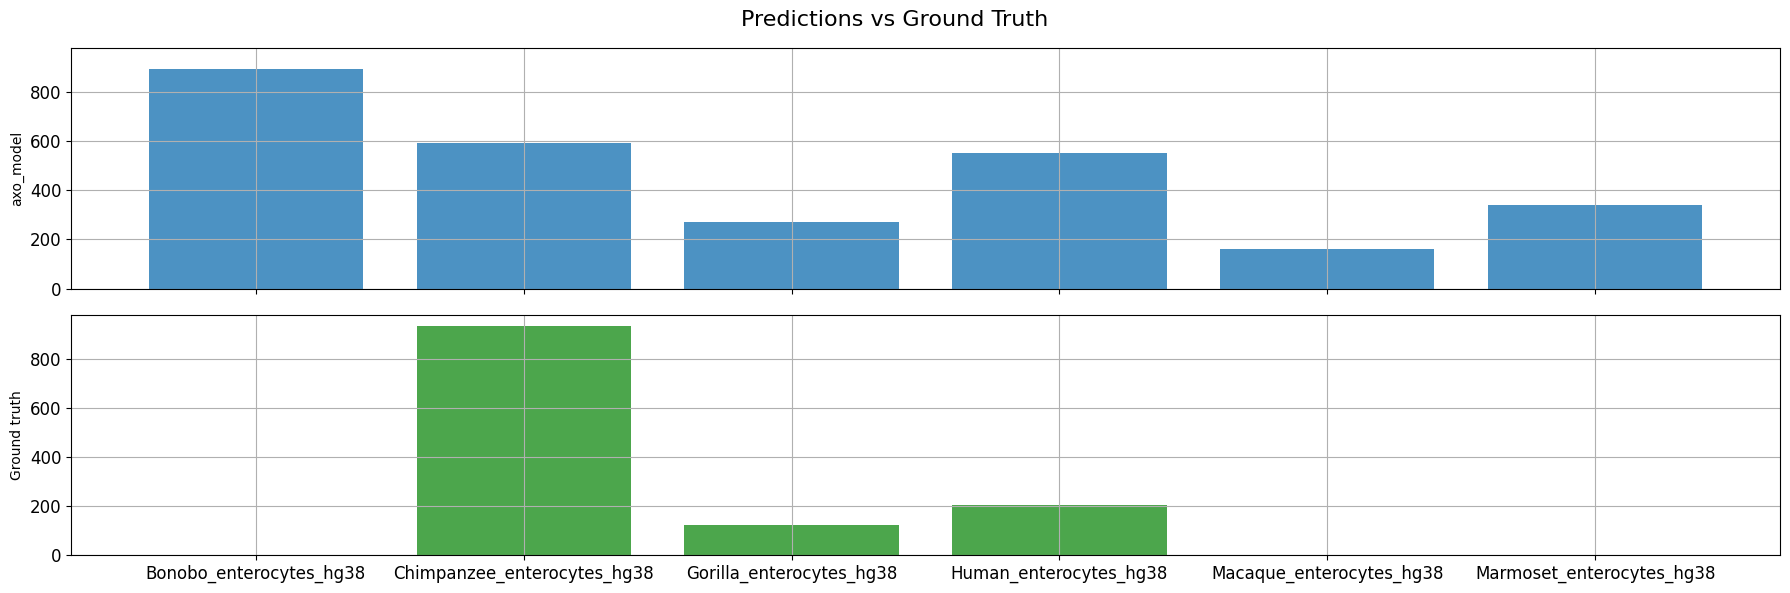

chr1:1371107-1373221
2025-06-20T14:57:20.820422+0200 INFO Plotting bar plots for region: chr1:1371107-1373221, models: ['axo_model']


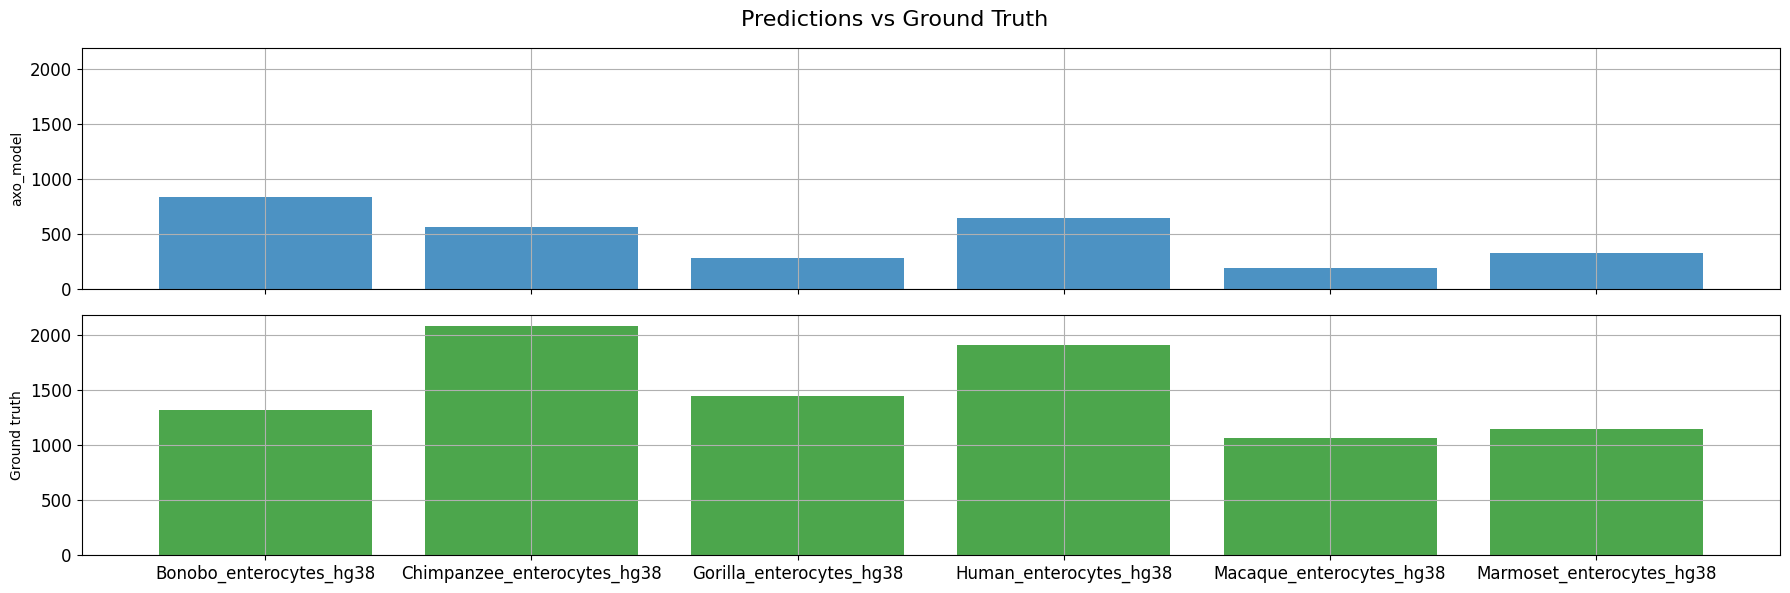

chr1:2120043-2122157
2025-06-20T14:57:20.987077+0200 INFO Plotting bar plots for region: chr1:2120043-2122157, models: ['axo_model']


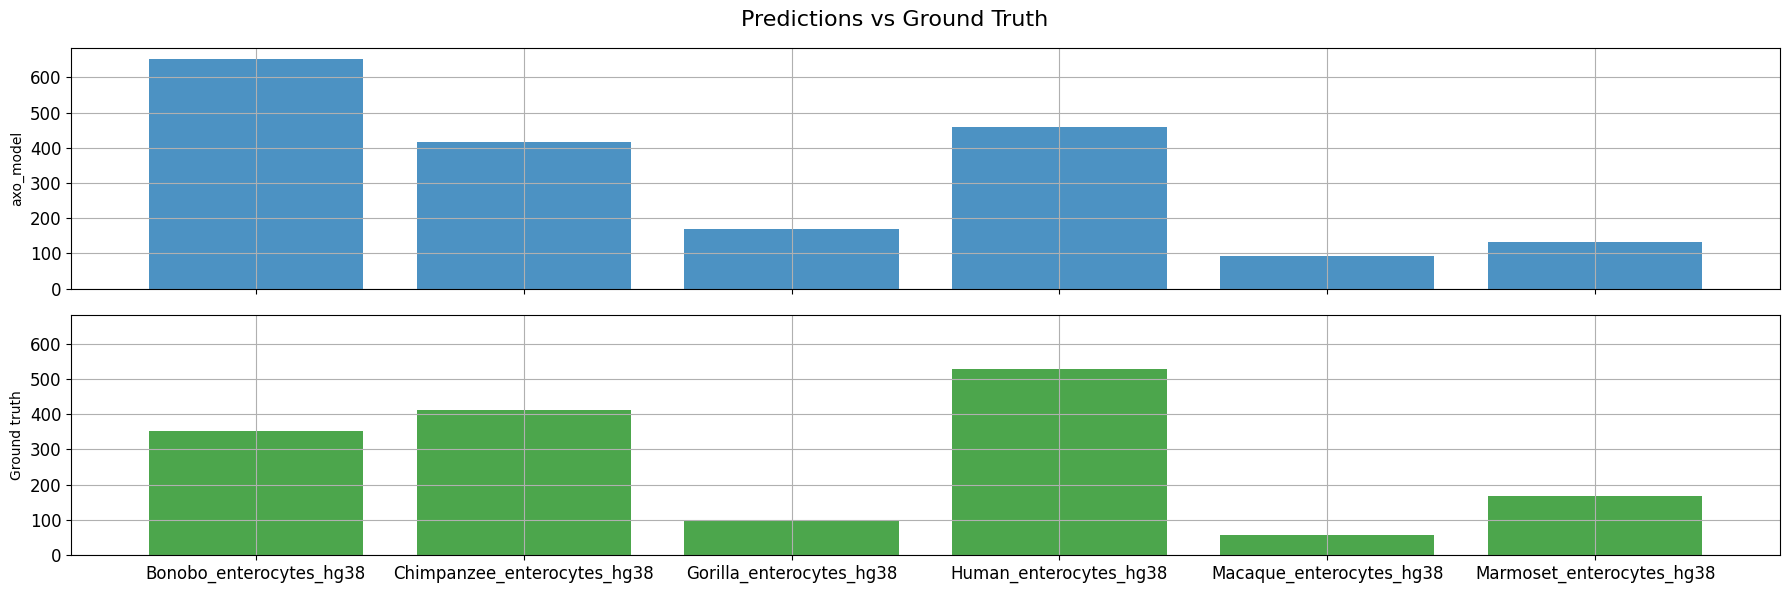

In [30]:
%matplotlib inline
# plot predictions vs ground truth for a random region in the test set defined by index
for idx in [10,98,207]:
    region = test_df.index[idx]
    print(region)
    crested.pl.bar.region_predictions(adata, region, title="Predictions vs Ground Truth")

In [31]:
def resize_region(region: str, length: int) -> str:
    """
    Resizes a genomic region around its center to a specified length.

    Parameters:
    - region (str): Genomic region in format 'chrom:start-end'
    - length (int): Desired length of the output region

    Returns:
    - str: New region in the same format, centered on original midpoint
    """
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    center = (start + end) // 2

    new_start = center - length // 2
    new_end = new_start + length

    return f"{chrom}:{new_start}-{new_end}"

In [35]:
# similar example but with region names as input
regions_of_interest = [
    "chr1:2120043-2122157"
]  # FIRE enhancer region (Microglia enhancer)

regions_of_interest = [resize_region(x,length=2114) for x in regions_of_interest]
classes_of_interest = list(adata.obs_names)
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))

scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    regions_of_interest,
    target_idx=class_idx,
    model=model,
)

2025-06-20T14:59:57.228992+0200 INFO Calculating contribution scores for 6 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [01:17<00:00, 77.91s/it]


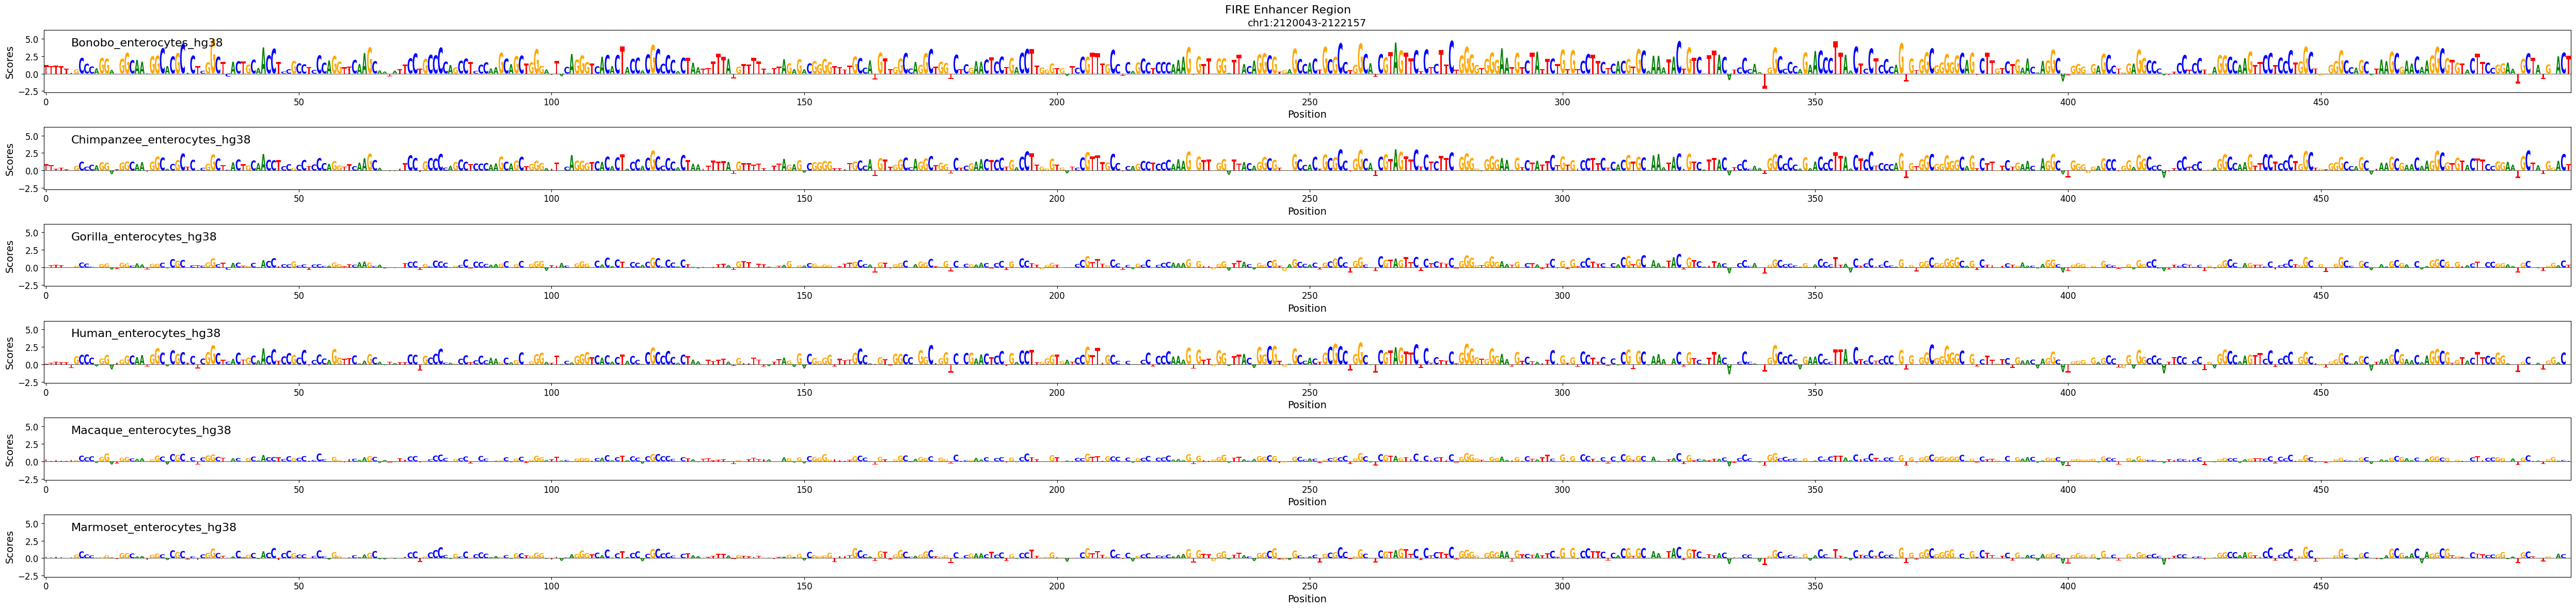

In [36]:
%matplotlib inline
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    sequence_labels=regions_of_interest,
    class_labels=classes_of_interest,
    zoom_n_bases=500,
    title="FIRE Enhancer Region",
)  # zoom in on the center 500bp

2025-06-20T15:08:31.937015+0200 INFO Plotting density scatter for class: Bonobo_enterocytes_hg38, models: ['axo_model'], split: test


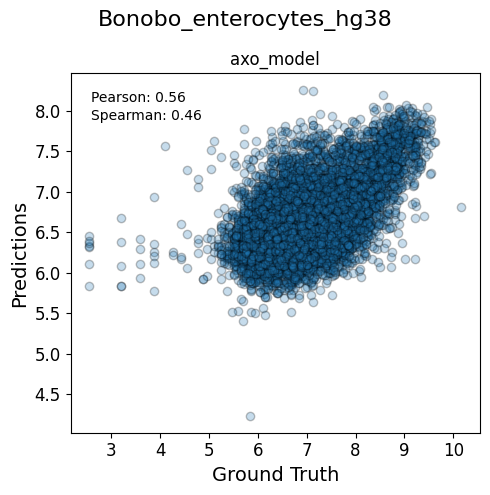

2025-06-20T15:08:32.175328+0200 INFO Plotting density scatter for class: Chimpanzee_enterocytes_hg38, models: ['axo_model'], split: test


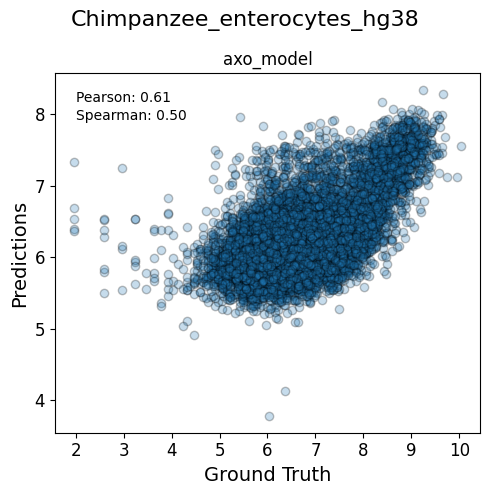

2025-06-20T15:08:32.331149+0200 INFO Plotting density scatter for class: Gorilla_enterocytes_hg38, models: ['axo_model'], split: test


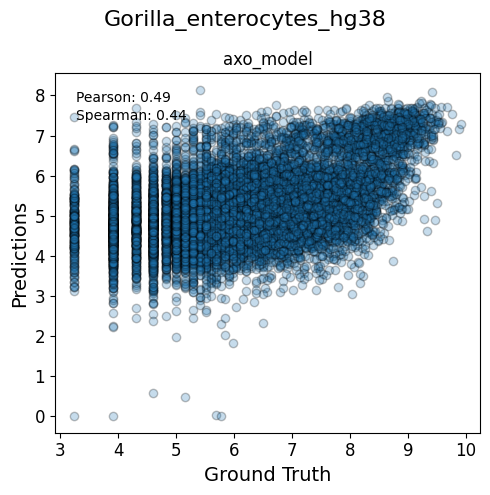

2025-06-20T15:08:32.502004+0200 INFO Plotting density scatter for class: Human_enterocytes_hg38, models: ['axo_model'], split: test


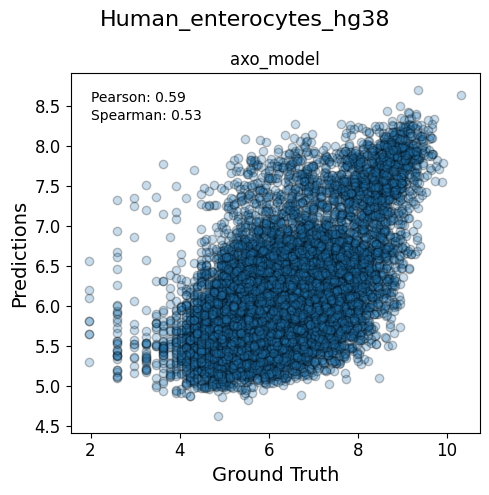

2025-06-20T15:08:32.669314+0200 INFO Plotting density scatter for class: Macaque_enterocytes_hg38, models: ['axo_model'], split: test


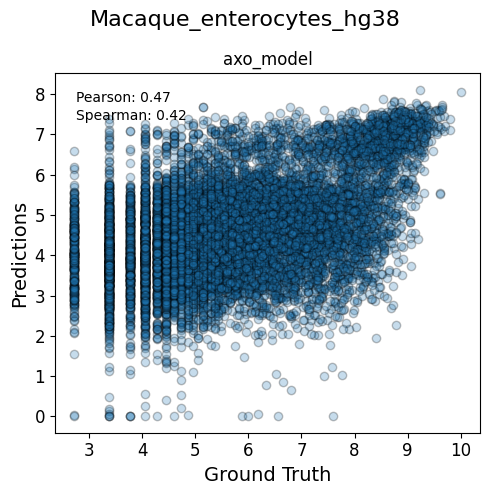

2025-06-20T15:08:32.844075+0200 INFO Plotting density scatter for class: Marmoset_enterocytes_hg38, models: ['axo_model'], split: test


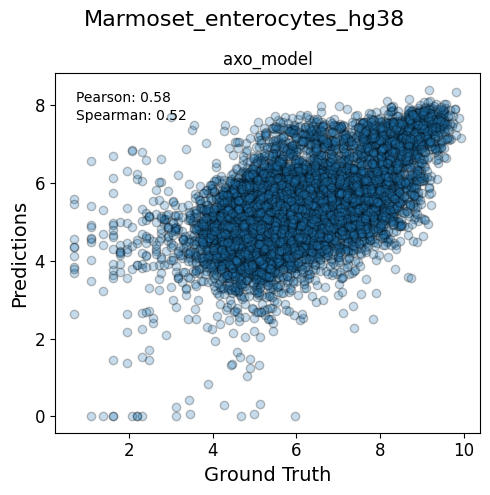

In [37]:
for classn in adata.obs_names:
    crested.pl.scatter.class_density(
        adata,
        class_name=classn,
        model_names=["axo_model"],
        split="test",
        log_transform=True,
        width=5,
        height=5,
    )

2025-06-20T15:09:45.776085+0200 INFO Plotting heatmap correlations for split: test, models: ['axo_model']


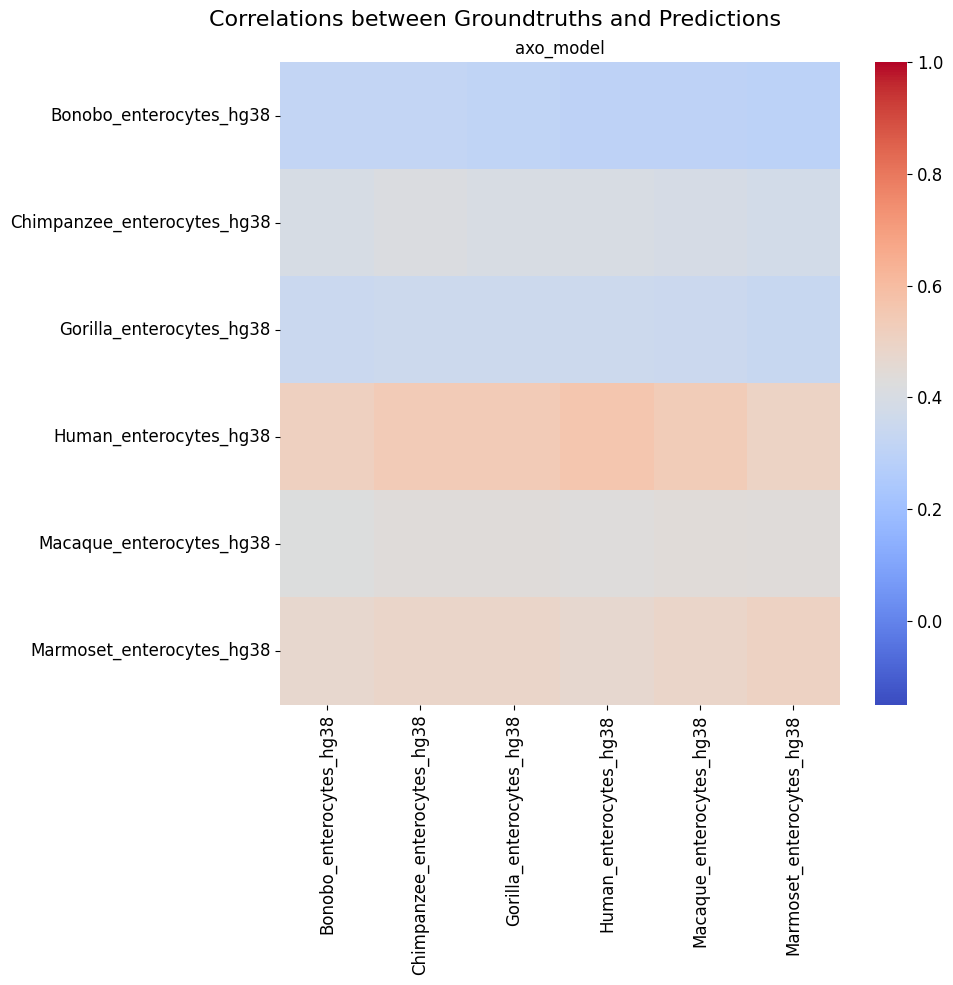

In [38]:
crested.pl.heatmap.correlations_predictions(
    adata,
    split="test",
    title="Correlations between Groundtruths and Predictions",
    x_label_rotation=90,
    width=10,
    height=10,
    log_transform=True,
    vmax=1,
    vmin=-0.15,
)

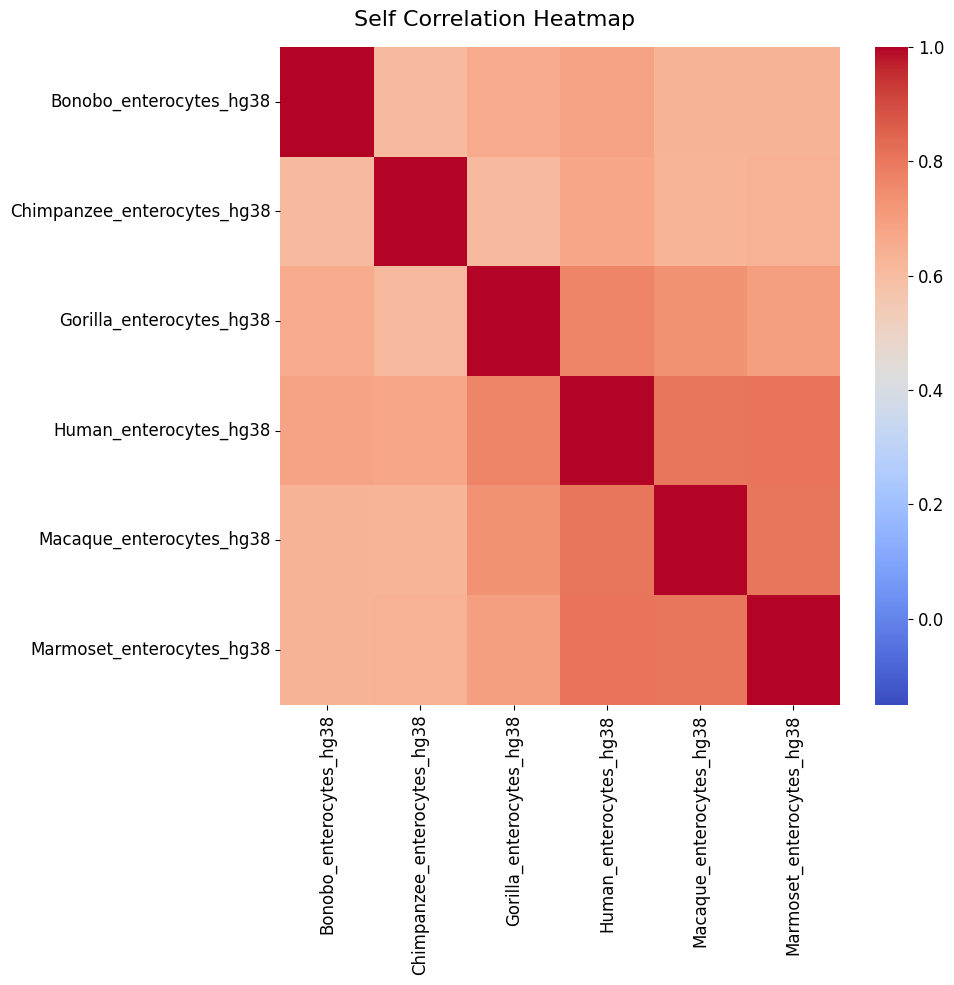

In [39]:
crested.pl.heatmap.correlations_self(
    adata,
    title="Self Correlation Heatmap",
    x_label_rotation=90,
    width=10,
    height=10,
    vmax=1,
    vmin=-0.15,
)